# Diabetes prediction
This dataset is publicly available and properly described.
I used diabetes from sklearn dataset to get the relationship between different factors and disease progression.
Then make a prediction and examine it. 

In [56]:
#Useful imports
import numpy as np
import pandas as pd
import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

diabetes = sklearn.datasets.load_diabetes()
print(diabetes.DESCR)
#"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements 
#were obtained for each of n = 442 diabetes patients, as well as the response of interest, 
#a quantitative measure of disease progression one year after baseline."

#In the tab delimited file above, the variables are named

#AGE SEX BMI BP S1 S2 S3 S4 S5 S6 Y
#whereas, in the R file, they are named
#age sex bmi map tc ldl hdl tch ltg glu y

Loading BokehJS ...

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

# Age and Disease progreesion scatter plot

Text(0.5,1,'Scatter plot')

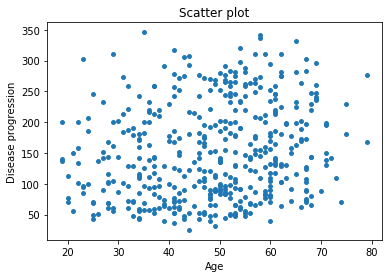

In [148]:
#rebuild data and draw the scatter plot
from numpy import loadtxt
URL='https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'
diabet = np.loadtxt(URL, delimiter="\t", skiprows=1)
diabet=pd.DataFrame(diabet)
diabet
#Age and disease progression
#matplotlib

x0=diabet[0]
y=diabet[10]
z = 15
plt.scatter(x0, y, s = z)
plt.xlabel('Age')
plt.ylabel('Disease progression')
plt.title('Scatter plot')

# BMI and Disease progression regression plot with trend

[Text(0,0.5,'disease progression'), Text(0.5,0,'BMI')]

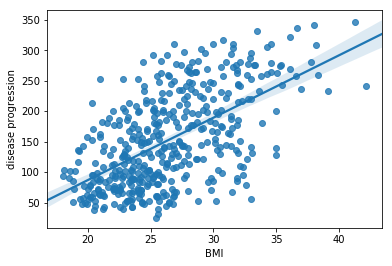

In [147]:
#BMI and disease progression
#Regression Plot
x2=diabet[2]

plt.figure(1)
pl=sns.regplot(x=x2, y=y, data=diabet)
pl.set(xlabel='BMI', ylabel='disease progression')

# Prediction

In [106]:
# Split the data into train (70%)and test(30%) set
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [53]:
#Use statsmodels to generate predictions and mean-square error.
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('y_train~X_train',data=diabetes)
result=model.fit()
print(result.params)
result.summary()

model = smf.OLS(y_train,X_train)
result=model.fit()
yhat=result.predict(X_test)
print(yhat)

mse_error = np.mean((yhat-y_test) ** 2)
print(mse_error)


Intercept      152.401906
X_train[0]      16.787258
X_train[1]    -210.160132
X_train[2]     474.449175
X_train[3]     299.257100
X_train[4]   -1130.291378
X_train[5]     799.044094
X_train[6]     140.779451
X_train[7]      79.899875
X_train[8]     858.792907
X_train[9]     164.406612
dtype: float64
[-113.95510362  -43.89038708  -25.77682737  105.31991138   24.38764111
  -37.10977501 -105.03404117  -38.49731383 -114.82001191 -123.15445514
  105.68286768   32.86557021  -11.87891819  -22.64418663  -12.80610082
  -31.19470645   30.47280313  -31.38972537  -76.68317716  -32.83627947
   17.77261038  -43.91536044   72.71827497  -83.17982727   38.9146857
    9.10956208   50.5048886   -92.10780517  -88.24204205  -48.60667869
   60.03189711  -85.25583647   54.39732607   23.59175614  -86.18763384
  -24.66794493  -34.83411992  -95.03242865  -61.39751269  -25.43775276
  -71.53186095  -17.70915367  -76.54646395   -0.49963413   48.58539827
  -31.44126761  -21.65701789  101.78586602   73.46887152  -39

In [10]:
#using sklearn.ensemble.RandomForestRegressor() to generate predictions and mean-suqare error
from patsy import dmatrices
y,X= dmatrices('y_train~X_train-y_train',data=diabetes)
model = sklearn.ensemble.RandomForestRegressor()
model.fit(X_train,y_train)

yhat=model.predict(X_test)
print(yhat)

mse_error2=np.mean((yhat-y_test)**2)
print(mse_error2)


[173.5  79.5 131.9 180.6 131.8 125.6 159.8 210.3 116.1 202.  133.8 158.3
 173.  132.6 139.2 115.4 172.9 146.8  92.6 138.   65.3 146.8 176.3 185.9
 188.9 153.2 176.4  68.4 126.1 179.4 130.8  69.3  78.3 203.5  90.5 104.3
 123.4  77.4 145.2 161.2 226.2  89.8  75.6 151.5 101.2 191.4 114.9 212.3
 135.9 169.4 103.9 205.  128.7 104.  242.9 209.2 175.3 205.1 172.5 101.8
 126.3 147.7 138.8 103.2  80.1 185.8 277.6 192.5  78.2 161.1 204.8 133.3
  73.2 145.3  99.2 260.8 108.4 210.9 243.8 164.6  84.6 167.2 108.  158.1
  73.4 167.  194.8 114.9 136.3 119.3  85.1 244.3 108.1  87.3 141.5 205.8
 216.9  93.1 136.7 150.7 237.8 125.7 121.9 153.6 134.5 102.4 144.2 111.1
 120.8  82.6 133.5 118.4 105.5 174.3 214.   80.8  97.2 150.  124.4 135.8
 274.6  86.6 109.4 189.3 186.9 229.9  87.9  99.8  98.7  92.9 100.  224.7
 231.7]
3765.4306015037596


In [12]:
#Compare the mean square error and determine which regressor is better
print(mse_error-mse_error2)
print('mse_error>mean_error2, therefore sklearn.ensemble.RandomForestRegressor is better for this prediction')

22200.996449282757
mse_error>mean_error2, therefore sklearn.ensemble.RandomForestRegressor is better for this prediction
